### DOW2 Analysis Notebook

Set up

In [2]:
import pandas as pd
import re

In [3]:
big5 = pd.read_csv('data/openpsych_data_scored.csv')

In [4]:
big5.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'country', 'E1',
       'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3',
       'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
       'C8', 'C9', 'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9',
       'O10', 'race_cat', 'gender_cat', 'O', 'C', 'E', 'A', 'N', 'E_pct',
       'A_pct', 'C_pct', 'N_pct', 'O_pct'],
      dtype='str')

Average American (Demographics)

Filter for Americans (completed survey in US)

In [5]:
big5_us = big5[big5["country"] == "US"]

In [6]:
len(big5_us)

8753

Age

In [7]:
med_age = big5_us["age"].median()
print(med_age)

21.0


Race

In [8]:
mode_race = big5_us["race"].mode()
print(mode_race)

0    3
Name: race, dtype: int64


In [9]:
race_values = '''1=Mixed Race, 2=Arctic (Siberian, Eskimo), 3=Caucasian (European), 
4=Caucasian (Indian), 5=Caucasian (Middle East), 6=Caucasian (North African, Other), 
7=Indigenous Australian, 8=Native American, 
9=North East Asian (Mongol, Tibetan, Korean Japanese, etc), 
10=Pacific (Polynesian, Micronesian, etc), 
11=South East Asian (Chinese, Thai, Malay, Filipino, etc), 12=West African, Bushmen, Ethiopian, 13=Other, 0=missed
'''

parts = re.split(r'(?:,\s+)?([0-9]+)=', race_values.strip())

race_keys = [int(key_val) for key_val in parts[1::2]]
race_values = parts[2::2] #Pasted from class workbook

In [10]:
race_mapping = dict(zip(race_keys,race_values))
race_mapping #Pasted from class workbook

{1: 'Mixed Race',
 2: 'Arctic (Siberian, Eskimo)',
 3: 'Caucasian (European)',
 4: 'Caucasian (Indian)',
 5: 'Caucasian (Middle East)',
 6: 'Caucasian (North African, Other)',
 7: 'Indigenous Australian',
 8: 'Native American',
 9: 'North East Asian (Mongol, Tibetan, Korean Japanese, etc)',
 10: 'Pacific (Polynesian, Micronesian, etc)',
 11: 'South East Asian (Chinese, Thai, Malay, Filipino, etc)',
 12: 'West African, Bushmen, Ethiopian',
 13: 'Other',
 0: 'missed'}

European caucasian

Gender

In [43]:
mode_gender = big5_us["gender"].mode()
print(mode_gender)

0    2
Name: gender, dtype: int64


Female

#### The average American, according to the sample, is a 21 year old white female.

Peronality

In [12]:
traits = ['E_pct', 'A_pct', 'C_pct', 'N_pct', 'O_pct']

med_personality = big5_us[traits].median().round(1)
med_personality

E_pct    49.0
A_pct    54.0
C_pct    52.0
N_pct    54.0
O_pct    52.0
dtype: float64

In [40]:
trait_labels = {
    'E_pct': 'Extraversion',
    'A_pct': 'Agreeableness',
    'C_pct': 'Conscientiousness',
    'N_pct': 'Neuroticism',
    'O_pct': 'Openness'
}

In [19]:
med_personality = med_personality.rename(index = trait_labels)
med_personality

Extraversion         49.0
Agreeableness        54.0
Conscientiousness    52.0
Neuroticism          54.0
Openness             52.0
dtype: float64

In [15]:
import matplotlib.pyplot as plt

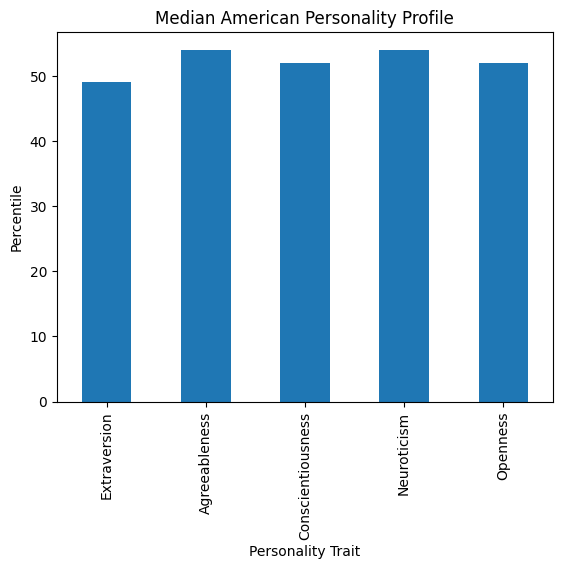

In [20]:
med_personality.plot(kind = 'bar')

plt.title("Median American Personality Profile")
plt.xlabel("Personality Trait")
plt.ylabel("Percentile")

plt.show()

Deviation of respondents

In [41]:
big5_us_clean = big5_us.dropna(subset = traits) #This command suddenly started returning 'nan'
#so I used ChatGPT to add a line to drop the NAs

med_personality = big5_us_clean[traits].median()

diff = abs(big5_us[traits] - med_personality)

big5_us['deviation'] = diff.mean(axis = 1)

median_dev = big5_us['deviation'].median()

print(median_dev) #Also used ChatGPT to think through how I could structure the deviation commands

25.4


Person by age

In [42]:
bins = [0, 18, 25, 35, 50, 100]
labels = ['Under 18', '18–24', '25–34', '35–49', '50+']

big5_us['age group'] = pd.cut(
    big5_us['age'],
    bins=bins,
    labels=labels,
    right=False
) #Used ChatGPT to see how I could group by age and make the table

In [39]:
traits = ['E_pct', 'A_pct', 'C_pct', 'N_pct', 'O_pct']

age_profiles = big5_us.groupby('age group')[traits].median()

age_profiles = big5_us.groupby('age group')[traits].median()

age_profiles.columns = ['Extraversion',
                        'Agreeableness',
                        'Conscientiousness',
                        'Neuroticism',
                        'Openness']

age_profiles

,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness
age group,,,,,
Under 18,49.0,42.0,37.0,44.0,52.0
18–24,49.0,54.0,52.0,50.0,52.0
25–34,53.0,59.0,57.0,54.0,58.0
35–49,53.0,59.0,67.0,62.0,52.0
50+,57.0,65.0,67.0,66.0,58.0
